In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import prep


In [8]:
df = prep.get_stores_data()

In [9]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2,9.24


In [10]:
df2 = df.sale_amount.resample("D").sum().reset_index()
X = df2.sale_date
y = df2.sale_amount

In [21]:
tss = TimeSeriesSplit(n_splits=5,max_train_size=None)
for train_index,test_index in tss.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    #print(len(X_train))
    print(len(y_test))

304
304
304
304
304


In [16]:
X_train.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


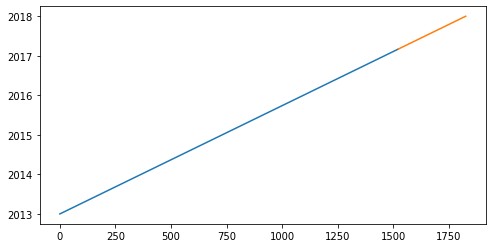

In [25]:
plt.figure(figsize=(8,4))
plt.plot(y=y_train,y=X_train)
plt.plot(y=x=X_test)
plt.show()